# Note: This plot is just for visualization, the intersection part is multiplied by 10 so I can see what is happening

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df1 = pd.read_csv("./data/reddit/cm/asktrp_comments.csv")

In [3]:
df2 = pd.read_csv("./data/reddit/cm/TheRedPill_comments.csv")

### Modeling the DataFrames for the Analysis

In [4]:
def complement_df(df, reddit, timeline=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']):
    df = pd.DataFrame(df[["Author", "Publish Date"]])
    df["reddit"] = reddit
    df = df[df.Author != "[deleted]"]
    df['time'] = [str(item)[:len(timeline[0])] for item in df["Publish Date"]]
    
    return df

In [5]:
df1 = complement_df(df1, 'asktrp')
df2 = complement_df(df2, 'TheRedPill')

### This algorithm considers each author equal, independent of its activity

### Note: I multiply the intersection by 10, so it is easier to see the correlation

In [6]:
def comparing_subreddits(df1, df2, timeline):
    
    inter = []
    A_B = []
    B_A = []
    
    for time in timeline:
        # for the first subreddit:
        sub1 = df1[df1.time == time]
        sub1 = sub1["Author"].drop_duplicates()

        # for the second subreddit:
        sub2 = df2[df2.time == time]
        sub2 = sub2["Author"].drop_duplicates()

        # Comparing both:
        inter.append(10 * len(sub1[sub1.isin(sub2)]))
        A_B.append(len(sub1[~sub1.isin(sub2)]))
        B_A.append(len(sub2[~sub2.isin(sub1)]))
    
    print(inter)
    print(A_B)
    print(B_A)
    return inter, A_B, B_A

In [7]:
def plot_comparasion(df1, df2, sub1, sub2, timeline=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']):
    inter, A_B, B_A = comparing_subreddits(df1, df2, timeline)
    sns.set()
    sns.set_context("notebook")
    plt.plot(timeline, inter)
    plt.plot(timeline, A_B)
    plt.plot(timeline, B_A)
    plt.xticks(timeline[::2])
    plt.legend(['inter', 'A - B', 'B - A'])
    plt.title(f"Relation between {sub1} (A) and {sub2} (B)")

[0, 9020, 45190, 67770, 18660, 0, 0, 0]
[0, 218, 2113, 4791, 11746, 15356, 18810, 4797]
[80, 8021, 20240, 21898, 3332, 0, 0, 0]


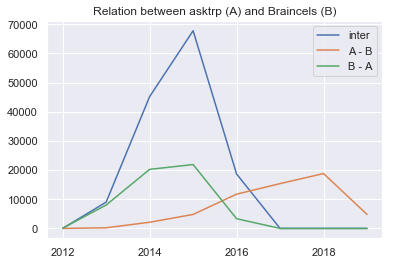

In [8]:
plot_comparasion(df1, df2, 'asktrp', 'The Red Pill')

## Comparing Groups of Subreddits

In [9]:
def create_df(subreddits, timeline):
    for reddit in subreddits:
        temp_df = pd.read_csv(f'./data/reddit/cm/{reddit}_comments.csv')
        temp_df = complement_df(temp_df, reddit, timeline)
        if reddit == subreddits[0]:
            df = temp_df
        else:
            df = df.append(temp_df, ignore_index=True)
    return df

### Mens Rights:

In [11]:
MR_subreddits = ['LadyMRAs', 'FeMRADebates', 'againstmensrights', 'Masculism', 'MensRants',
                 'FeMRA', 'MRActivism', 'MensRightsLaw', 'MRRef']

### Braincels:

In [13]:
Braincels_subreddits = ['askanincel', 'BlackPillScience', 'IncelsWithoutHate', 'Braincels']

### Red Pill:

In [15]:
RedPill_subreddits = ['RedPillParenting', 'TRPOffTopic', 'GEOTRP', 'thankTRP', 'redpillbooks',
                      'becomeaman', 'exredpill', 'RedPillWomen', 'TheBluePill', 'asktrp', 'TheRedPill']

### Comparing in 2019:

In [22]:
months=['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
        '2018-10', '2018-11', '2018-12']

In [23]:
MR_df = create_df(MR_subreddits, months)

In [24]:
Braincels_df = create_df(Braincels_subreddits, months)

In [25]:
Red_Pill_df = create_df(RedPill_subreddits, months)

[140, 50, 180, 240, 170, 150, 30, 80, 120, 90, 100, 60]
[440, 438, 404, 417, 400, 419, 380, 346, 366, 385, 346, 349]
[3297, 4486, 6242, 8287, 10873, 10512, 11261, 11008, 9694, 1136, 1469, 1708]


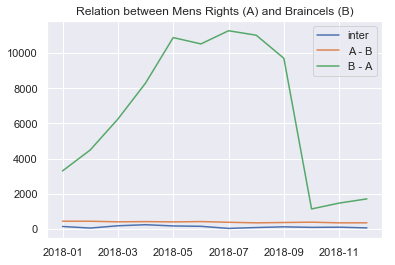

In [26]:
plot_comparasion(MR_df, Braincels_df, 'Mens Rights', 'Braincels', timeline=months)

[390, 210, 220, 290, 340, 270, 130, 200, 250, 200, 250, 160]
[415, 422, 400, 412, 383, 407, 370, 334, 353, 374, 331, 339]
[4649, 4260, 4837, 5047, 5783, 5343, 5621, 5712, 5992, 5955, 5899, 6207]


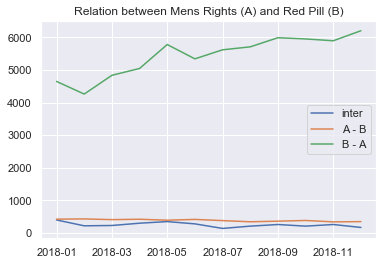

In [27]:
plot_comparasion(MR_df, Red_Pill_df, 'Mens Rights', 'Red Pill', timeline=months)

[1030, 1150, 1370, 1890, 2630, 2220, 2630, 2440, 2660, 600, 860, 910]
[3208, 4376, 6123, 8122, 10627, 10305, 11001, 10772, 9440, 1085, 1393, 1623]
[4585, 4166, 4722, 4887, 5554, 5148, 5371, 5488, 5751, 5915, 5838, 6132]


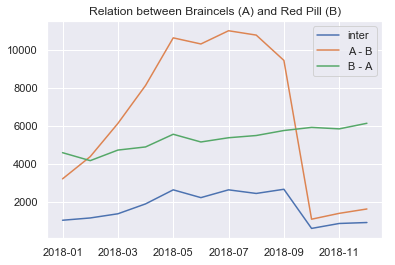

In [28]:
plot_comparasion(Braincels_df, Red_Pill_df, 'Braincels', 'Red Pill', timeline=months)

### Comparing by years:

In [10]:
years=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [32]:
MR_df = create_df(MR_subreddits, years)

In [33]:
Braincels_df = create_df(Braincels_subreddits, years)

In [34]:
Red_Pill_df = create_df(RedPill_subreddits, years)

#### Mens Rights - Braincels

[0, 0, 0, 0, 0, 380, 1790, 280]
[1444, 3053, 5013, 3662, 2481, 2059, 1661, 781]
[0, 0, 0, 0, 0, 2923, 48392, 9414]


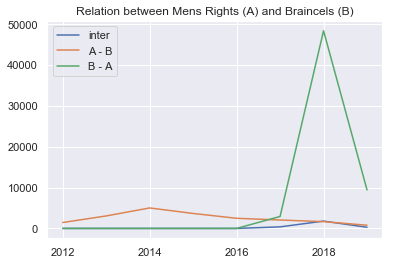

In [17]:
plot_comparasion(MR_df, Braincels_df, 'Mens Rights', 'Braincels')

#### Mens Rights - Red Pill

[80, 7600, 14080, 10860, 6680, 3970, 2760, 650]
[1436, 2293, 3605, 2576, 1813, 1700, 1564, 744]
[72, 11513, 33552, 41387, 25966, 24888, 28695, 10044]


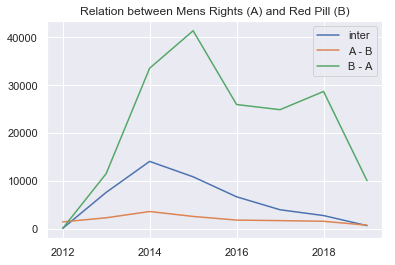

In [18]:
plot_comparasion(MR_df, Red_Pill_df, 'Mens Rights', 'Red Pill')

#### Braincels - Red Pill

[0, 0, 0, 0, 0, 2900, 22910, 3840]
[0, 0, 0, 0, 0, 2671, 46280, 9058]
[80, 12273, 34960, 42473, 26634, 24995, 26680, 9725]


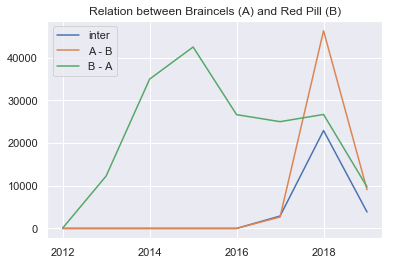

In [19]:
plot_comparasion(Braincels_df, Red_Pill_df, 'Braincels', 'Red Pill')

### MGTOW and Others

In [29]:
MGTOW_df = create_df(['MGTOW'], years)

In [30]:
reddits = ['Mens Rights', 'Braincels', 'Red Pill']

[130, 260, 960, 1980, 1800, 2470, 2600, 700]
[22, 148, 911, 4044, 9963, 23142, 40147, 23367]
[1431, 3027, 4917, 3464, 2301, 1850, 1580, 739]
[0, 0, 0, 0, 0, 4750, 53730, 11570]
[35, 174, 1007, 4242, 10143, 22914, 35034, 22280]
[0, 0, 0, 0, 0, 2486, 43198, 8285]
[30, 1010, 5700, 18050, 20120, 24110, 34760, 10540]
[32, 73, 437, 2437, 8131, 20978, 36931, 22383]
[77, 12172, 34390, 40668, 24622, 22874, 25495, 9055]


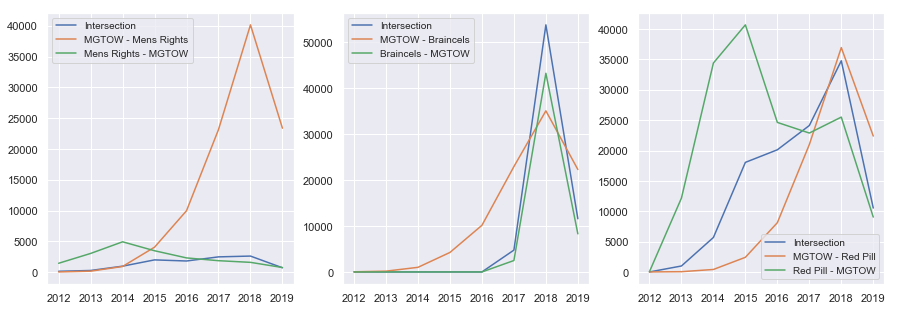

In [36]:
c = 0
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
for df in [MR_df, Braincels_df, Red_Pill_df]:
    inter, A_B, B_A = comparing_subreddits(MGTOW_df, df, years)
    sns.set()
    sns.set_context("notebook")
    axs[c].plot(years, inter)
    axs[c].plot(years, A_B)
    axs[c].plot(years, B_A)
    axs[c].legend(['Intersection', f'MGTOW - {reddits[c]}', f'{reddits[c]} - MGTOW'], fontsize=10)
    c+=1